In [69]:
#mengimport library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree       
import pydotplus 
from IPython.display import Image
import itertools
# import warnings
# warnings.filterwarnings(action='ignore')


In [70]:
from google.colab import files              #memanggil library google.colab
uploaded = files.upload()                   #upload dataframe 'breast-cancer.csv' 

Saving breast-cancer.csv to breast-cancer (4).csv


In [71]:
data = pd.read_csv('breast-cancer.csv', sep = ';') 
data

,Class,Age,Menopause,tumor-size,inv-node,node-capes,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,03-Mei,no,3,left,left_low,no


In [72]:
#menghitung total data yang kosong di dataframe
data.isna().sum()

Class          0
Age            0
Menopause      0
tumor-size     0
inv-node       0
node-capes     0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [73]:
# mengubah data berupa kategori menjadi dalam bentuk angka
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Age'] = le.fit_transform(data['Age'])
data['Menopause'] = le.fit_transform(data['Menopause'])
data['tumor-size'] = le.fit_transform(data['tumor-size'])
data['inv-node'] = le.fit_transform(data['inv-node'])
data['node-capes'] = le.fit_transform(data['node-capes'])
data['breast'] = le.fit_transform(data['breast'])
data['breast-quad'] = le.fit_transform(data['breast-quad'])
data['irradiat'] = le.fit_transform(data['irradiat'])


print(data)


                    Class  Age  Menopause  ...  breast  breast-quad  irradiat
0    no-recurrence-events    1          2  ...       0            2         0
1    no-recurrence-events    2          2  ...       1            5         0
2    no-recurrence-events    2          2  ...       0            2         0
3    no-recurrence-events    4          0  ...       1            3         0
4    no-recurrence-events    2          2  ...       1            4         0
..                    ...  ...        ...  ...     ...          ...       ...
281     recurrence-events    1          2  ...       0            3         0
282     recurrence-events    1          2  ...       0            3         1
283     recurrence-events    4          0  ...       1            3         0
284     recurrence-events    2          0  ...       0            2         0
285     recurrence-events    3          0  ...       0            2         0

[286 rows x 10 columns]


In [74]:
# Memisahkan kolom Class dengan kolom lainnya
x=data.drop(['Class'], axis=1)
y=data['Class']


# Membagi data menjadi data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state= 143)

# **KNN**

In [75]:
kkn = KNeighborsClassifier()

# Membuat model KKN berdasarkan data train
kkn.fit(x_train,y_train)

# Membuat prediksi 
predictions = kkn.predict(x_test)
# Mendapatkan skor akurasi prediksi
acc_score = accuracy_score(y_test, predictions)

print("Akurasi Model KNN : {}".format(format(acc_score,'.3f')), '\n')
print("Confusion matriks : \n", confusion_matrix(y_test, predictions),"\n")


Akurasi Model KNN : 0.671 

Confusion matriks : 
 [[88 15]
 [32  8]] 



# **SVM**

In [76]:
svm = SVC()

# Membuat model svm berdasarkan data train yang diberikan
svm.fit(x_train,y_train)
# Membuat prediksi
predictions = svm.predict(x_test)
# Mendapatkan score akurasi prediksi
acc_score = accuracy_score(y_test, predictions)

print("Akurasi Model SVM  : {}".format(format(acc_score,'.3f')), '\n')
print("Confusion matriks : \n", confusion_matrix(y_test, predictions),"\n")


Akurasi Model SVM  : 0.720 

Confusion matriks : 
 [[103   0]
 [ 40   0]] 



# **DECISION TREE**

In [77]:

DTC = DecisionTreeClassifier()

# Membuat model svm berdasarkan data train yang diberikan
DTC.fit(x_train,y_train)
# Membuat prediksi
predictions = DTC.predict(x_test)
# Mendapatkan score akurasi prediksi
acc_score = accuracy_score(y_test, predictions)

print("Akurasi model Decision Tree: {}".format(format(acc_score,'.3f')), '\n')
print("Confusion matriks : \n", confusion_matrix(y_test, predictions),"\n")


Akurasi model Decision Tree: 0.650 

Confusion matriks : 
 [[79 24]
 [26 14]] 



In [78]:
#maximal kedalaman tree adalah 2
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf = clf.fit(x, y)

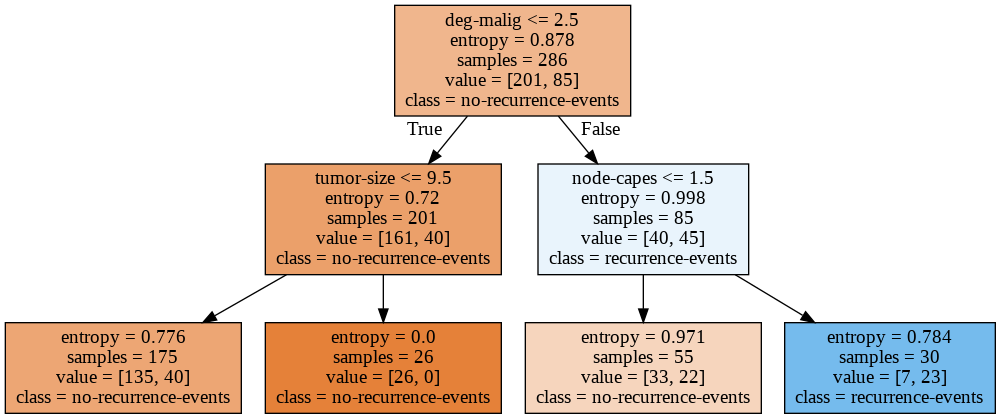

In [79]:
dot_data = tree.export_graphviz(clf, feature_names=x.columns, class_names=['no-recurrence-events','recurrence-events'], filled=True, 
                                out_file=None) 

graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [85]:
testData=  [["recurrence-events",1,2,5,0,1,2,0,3,0],
            ["recurrence-events",1,2,0,3,0,1,3,2,1],
            ["recurrence-events",4,0,3,0,1,1,1,3,0],
            ["no-recurrence-events",2,2,3,0,1,2,1,5,0],
            ["no-recurrence-events",2,2,3,0,1,2,0,2,0],]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Class,Age,Menopause,tumor-size,inv-node,node-capes,deg-malig,breast,breast-quad,irradiat
0,recurrence-events,1,2,5,0,1,2,0,3,0
1,recurrence-events,1,2,0,3,0,1,3,2,1
2,recurrence-events,4,0,3,0,1,1,1,3,0
3,no-recurrence-events,2,2,3,0,1,2,1,5,0
4,no-recurrence-events,2,2,3,0,1,2,0,2,0


In [86]:
testY = testData['Class']
testX = testData.drop(['Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Predicted Class
0,no-recurrence-events
1,recurrence-events
2,recurrence-events
3,no-recurrence-events
4,no-recurrence-events


In [82]:
#menngecek akurasi untuk beberapa data saja
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.40


Confusion matrix, without normalization


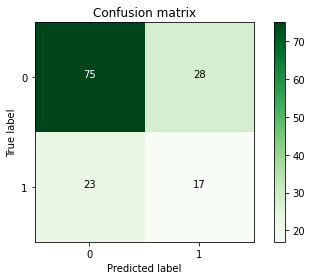

In [83]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
decision_tree_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(decision_tree_cm, [0, 1])
plt.show()



In [84]:
arr = decision_tree_cm

TP = arr[0,0]
FP = arr[0,1]
FN = arr[1,0]
TN = arr[1,1]

akurasi = (TP + TN) / (TP + FP + FN + TN)
print("Akurasi :", akurasi)

Akurasi : 0.6433566433566433
